In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import GridSearchCV
nltk.download('stopwords')
import numpy as np
# from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('macys_com.csv')
data

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Black
1,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Simple Grid
2,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",White
3,CK Black Collection Embrace Lace-Waist Thong Q...,$26.00,$26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,NaN,NaN,"[""Elastic lace waistband"", ""Lace at front and ...","[""M""]","[""M""]",Regal Sensous
4,Halo Lace Boyshort 870205,$15.00,$15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,5.0,2.0,"[""Stretch lace waistband"", ""All-over floral la...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40892,Sport High-Impact Underwire Bra 855170,$65.00,$34.99,http://www1.macys.com/shop/product/wacoal-spor...,Wacoal,Women - Lingerie & Shapewear - Bras,Macys US,Designed to withstand medium to high-impact wo...,4.2,5.0,"[""Wide adjustable straps"", ""Seamless molded st...","[""38C""]","[""38C""]",Poseidon/Caribbean Blue
40893,Wild Thistle French Lace Brief 4Y2234,$35.00,$35.00,http://www1.macys.com/shop/product/hanky-panky...,Hanky Panky,Women - Lingerie & Shapewear - Panties,Macys US,"Soft, luxurious lace is printed with a gorgeou...",NaN,NaN,"[""High waist"", ""Allover, soft lace"", ""Full bac...","[""S""]","[""S""]",Multi
40894,Plus Size Signature Lace Vikini 482374X,$32.00,$22.40,http://www1.macys.com/shop/product/hanky-panky...,Hanky Panky,Women - Lingerie & Shapewear - Sexy Lingerie,Macys US,You can't go wrong with Hanky Panky's signatur...,5.0,1.0,"[""Soft lace"", ""V-shaped waistband"", ""Lined at ...","[""3X""]","[""3X""]",Chai
40895,Modern Logo Pants D1632,$46.00,$46.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,"Comfy and low-key, these Modern pants from Cal...",NaN,NaN,"[""Wide elastic waistband features logo"", ""Full...","[""S"", ""M"", ""L""]","[""S"", ""M"", ""L""]",Black


In [ ]:
data = data[['product_name', 'review_count']]
data

,product_name,review_count
0,ID String Bikini QF1754,NaN
1,ID String Bikini QF1754,NaN
2,ID String Bikini QF1754,NaN
3,CK Black Collection Embrace Lace-Waist Thong Q...,NaN
4,Halo Lace Boyshort 870205,2.0
...,...,...
40892,Sport High-Impact Underwire Bra 855170,5.0
40893,Wild Thistle French Lace Brief 4Y2234,NaN
40894,Plus Size Signature Lace Vikini 482374X,1.0
40895,Modern Logo Pants D1632,NaN


In [ ]:
data['review_count'] = data['review_count'].fillna(0)

<ipython-input-7-360e47fcbf67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_count'] = data['review_count'].fillna(0)


In [ ]:
data['product_name'].isnull().sum()

0

In [ ]:
# Проверка содержания столбцов:

In [ ]:
unique =data['product_name'].unique()
print(unique)

['ID String Bikini QF1754'
 'CK Black Collection Embrace Lace-Waist Thong QF1621'
 'Halo Lace Boyshort 870205' 'After Midnight Retro Mesh Bralette 9K7124'
 'Perfectly Fit Memory Touch Racerback Bra QF1092'
 'Embrace Lace Contour Bra 853191'
 'Black Devotion Satin and Lace Thong QF1772'
 'Perfectly Fit Multi-Way Bra QF1121' 'Ciao Bella Lace Bralette 910244'
 'Embrace Lace Chemise 814191' 'Bodysuede Seamless Full-Figure Bra 85185'
 'Logo Hoodie QS5670' 'Seductive Comfort Lace Demi Bra QF1444'
 'CK Black Endless Plunge Push-Up Lace Bra QF1875'
 'b.active Low-Impact Underwire Sports Bra 953199'
 'Sport High-Impact Underwire Bra 855170'
 'Signature Lace-Trim Demi Bra QF1417'
 'Beauty Back Full Figure Lace Bra 76382' 'Modern Logo Pants D1632'
 'Logo Hipster QF1570' 'Retro Chic Contour Bra 853186'
 'Floral-Lace-Trim Boyshort 681211'
 'Wild Seduction Embroidered Balconette 851242'
 'b.provocative Racerback Bralette 910222'
 'CK Black Collection Spacer Sling Balconette Bra QF1197'
 'After Midni

In [ ]:
data['product_name'] = data['product_name'].str.lower()
data

<ipython-input-11-b8837a1ba634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_name'] = data['product_name'].str.lower()


,product_name,review_count
0,id string bikini qf1754,0.0
1,id string bikini qf1754,0.0
2,id string bikini qf1754,0.0
3,ck black collection embrace lace-waist thong q...,0.0
4,halo lace boyshort 870205,2.0
...,...,...
40892,sport high-impact underwire bra 855170,5.0
40893,wild thistle french lace brief 4y2234,0.0
40894,plus size signature lace vikini 482374x,1.0
40895,modern logo pants d1632,0.0


In [ ]:
# Функция удаления стоп-слов, если они есть

def clean_stop_words(text, stopwords):
    text = [word for word in text.split() if word not in stopwords]
    return " ".join(text)

data['product_name'] = data['product_name'].apply(lambda x: clean_stop_words(x, nltk_stopwords.words('english')))

<ipython-input-12-801461c8e614>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_name'] = data['product_name'].apply(lambda x: clean_stop_words(x, nltk_stopwords.words('english')))


In [ ]:
data['review_count'].unique()

array([  0.,   2.,   1.,  16.,  75.,   4.,  43.,  66., 217.,  33.,   3.,
         6.,   8.,  13., 178.,  11.,  53.,  27.,   7.,  31.,  22.,  20.,
        25.,   5.,  29., 105.,  12.,  79., 125.,  62.,  68.,  21., 406.,
         9.,  48., 167.,  23.,  65.,  26., 198., 147.,  41.,  40., 127.,
        17., 245.,  69.,  14.,  58., 287.,  19.,  18., 172.,  15., 137.,
       188.,  89., 129.,  51.,  59., 141.,  77.,  93., 220., 163.,  47.,
       354., 405.,  10., 114.,  78., 404., 126.,  46., 166.,  76., 286.,
        52.,  88.,  57., 162., 218.,  28.,  50.,  24., 136., 402., 187.,
        87., 161.,  64.,  45., 140., 124., 128., 160.,  32., 158., 135.,
       401.,  37., 305., 123.,  94., 139., 400., 244.,  96.,  86., 134.,
       186.,  73., 399.,  97.])

In [ ]:
data['review_count'].describe()

count    40897.000000
mean        19.807003
std         50.767880
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max        406.000000
Name: review_count, dtype: float64

In [ ]:
# -------------------------------

In [ ]:
X = data['product_name']
y = data['review_count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

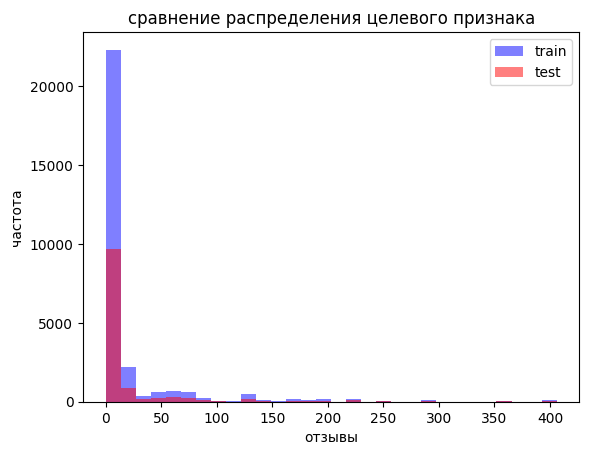

In [ ]:
# Для обучающей выборки
plt.hist(y_train, bins=30, color='blue', alpha=0.5, label='train')
# Для тестовой выборки
plt.hist(y_test, bins=30, color='red', alpha=0.5, label='test')

plt.xlabel('отзывы')
plt.ylabel('частота')
plt.title('сравнение распределения целевого признака')
plt.legend()

In [ ]:
#  Доля положительных значений целевого признака (продукт имеет хотя бы один отзыв)
train_pol = y_train[y_train > 0].shape[0] / y_train.shape[0]
test_pol= y_test[y_test > 0].shape[0] / y_test.shape[0]

print("обучающая", train_pol)
print("тестовая", test_pol)

обучающая 0.6380340238236629
тестовая 0.6386308068459657


In [ ]:
# Остальное - у товара 0 отзывов

In [ ]:
# Векторные представления с сочетанием по одному слову
count_idf = TfidfVectorizer(ngram_range=(1, 1))

tf_idf = count_idf.fit_transform(X_train)

In [ ]:
# Размеры векторов

print(tf_idf.shape)

(28627, 899)


In [ ]:
# 899 -вектор (899 уникальных слова в обучающем наборе данных)

In [ ]:
# -----------------------------------------

In [ ]:
# Обучение логистической регрессии:
model_lr = LogisticRegression(solver='lbfgs', random_state=5, max_iter=10000, n_jobs=-1)
model_lr.fit(tf_idf, y_train)

# В векторное представление
X_test_tfidf = count_idf.transform(X_test)

y_prog = model_lr.predict(X_test_tfidf)
y_prog_proba = model_lr.predict_proba(X_test_tfidf)
print(y_prog)
print(y_prog_proba)

[ 5. 22.  4. ...  6.  5.  8.]
[[2.59229453e-02 2.83998140e-02 9.24238184e-03 ... 2.09503059e-04
  1.79708736e-04 1.75368667e-04]
 [9.22230891e-02 4.73949296e-02 4.55591080e-02 ... 4.66496625e-04
  3.97209786e-04 3.87272514e-04]
 [1.50026989e-02 1.32854724e-02 1.64782331e-02 ... 1.88182487e-04
  1.62020333e-04 1.58150335e-04]
 ...
 [4.66186823e-02 3.58736578e-02 1.01548090e-02 ... 7.71539253e-05
  6.63061347e-05 6.47407371e-05]
 [2.59229453e-02 2.83998140e-02 9.24238184e-03 ... 2.09503059e-04
  1.79708736e-04 1.75368667e-04]
 [2.70223346e-02 9.47886578e-03 2.48449974e-03 ... 8.43903838e-05
  7.18475513e-05 7.00597419e-05]]


In [ ]:
# y_prog - каждое число в массиве представляет собой прогнозное значение для количества отзывов
# y_prog_proba - каждое число в строке это вероятность принадлежности примера к определенному значению количества отзывов

In [ ]:
# Проверка вероятности
y_prog_proba.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Доля правильных предсказаний базовой модели
accuracy = accuracy_score(y_test, y_prog)
print(accuracy)

0.8795436022819886


In [ ]:
# Подбор параметров для модели:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(model_lr, param_grid, cv=5)
grid.fit(tf_idf, y_train)
print("Лучшие параметры:", grid.best_params_)

# Лучшая модель к тестовым данным
y_prog2 = grid.predict(X_test_tfidf)
y_prog_proba2 = grid.predict_proba(X_test_tfidf)
print(y_prog2)
print(y_prog_proba2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_sol

Лучшие параметры: {'C': 10, 'penalty': 'l2'}
[ 5. 22.  4. ...  6.  5.  8.]
[[4.41588313e-03 4.97000922e-03 1.97909174e-03 ... 2.67414210e-05
  2.55619550e-05 2.54056016e-05]
 [1.20189286e-02 6.90710282e-03 6.28355248e-03 ... 5.10390882e-05
  4.85100290e-05 4.81800758e-05]
 [2.31184911e-03 1.80052155e-03 1.98219219e-03 ... 1.60877299e-05
  1.55061112e-05 1.54236714e-05]
 ...
 [7.44489782e-03 6.13926961e-03 1.55874878e-03 ... 5.76109936e-06
  5.48699118e-06 5.45149855e-06]
 [4.41588313e-03 4.97000922e-03 1.97909174e-03 ... 2.67414210e-05
  2.55619550e-05 2.54056016e-05]
 [3.95651950e-03 1.25673452e-03 3.84189505e-04 ... 7.82059066e-06
  7.41163652e-06 7.35916203e-06]]


In [ ]:
# Доля правильных предсказаний модели с лучшими параметрами
accuracy = accuracy_score(y_test, y_prog2)
print(accuracy)

0.8819070904645476


In [ ]:
y_prog_base = model_lr.predict(X_test_tfidf)
y_prog_best = grid.predict(X_test_tfidf)

predictions_df = pd.DataFrame({'Базовая модель': y_prog_base, 'Модель с лучшими параметрами': y_prog_best})
print(predictions_df)

       Базовая модель  Модель с лучшими параметрами
0                 5.0                           5.0
1                22.0                          22.0
2                 4.0                           4.0
3                78.0                          78.0
4                 0.0                           0.0
...               ...                           ...
12265             0.0                           0.0
12266             0.0                           0.0
12267             6.0                           6.0
12268             5.0                           5.0
12269             8.0                           8.0

[12270 rows x 2 columns]


In [ ]:
diff_indices = np.where(y_prog_base != y_prog_best)[0]
diff_pred = pd.DataFrame({'Базовая модель': y_prog_base[diff_indices], 'Модель с лучшими параметрами': y_prog_best[diff_indices]})

print(diff_pred)

    Базовая модель  Модель с лучшими параметрами
0              0.0                           1.0
1              2.0                          11.0
2              0.0                           2.0
3              0.0                           2.0
4              0.0                          94.0
5              2.0                          11.0
6              0.0                           1.0
7              2.0                          11.0
8              0.0                          94.0
9              0.0                           1.0
10             2.0                          11.0
11             0.0                           1.0
12             0.0                           1.0
13             0.0                           1.0
14             3.0                           0.0
15             2.0                          11.0
16             0.0                          53.0
17             0.0                          53.0
18             2.0                          11.0
19             0.0  

In [ ]:
# 1. Сравнение с кол-вом отзывов на существующих товарах:

In [ ]:
# Вывод средних значений:
#product_names = ['id string bikini qf1754', 'sport high-impact underwire bra 855170', 'modern logo pants d1632']
#selected_data = data[data['product_name'].isin(product_names)]
#
#mean_review_count = selected_data.groupby('product_name')['review_count'].mean()
#
#for product_name, review_count in mean_review_count.items():
#    print(f"{product_name}: {np.round(review_count)}")

id string bikini qf1754: 0.0
modern logo pants d1632: 1.0
sport high-impact underwire bra 855170: 141.0


In [ ]:
# Вывод значений на лучших параметрах:
#new_product_names = ['id string bikini qf1754', 'sport high-impact underwire bra 855170', 'modern logo pants d1632']
#
#new_product_names_tfidf = count_idf.transform(new_product_names)
#y_prog_new = grid.predict(new_product_names_tfidf)
#
#for product_name, prediction in zip(new_product_names, y_prog_new):
#    print(product_name + ": " + str(prediction))

id string bikini qf1754: 0.0
sport high-impact underwire bra 855170: 217.0
modern logo pants d1632: 1.0


In [ ]:
# 2. Тест на товарах написанных на русском языке:

In [ ]:
# Вывод значений на лучших параметрах:
#new_product_names = ['бикини с завязками идентификатора', 'спортивный лифчик с высокой поддержкой и каркасом',
#                 'современные брюки с логотипом']
#
#new_product_names_tfidf = count_idf.transform(new_product_names)
#y_prog_new = grid.predict(new_product_names_tfidf)
#
#for product_name, prediction in zip(new_product_names, y_prog_new):
#    print(product_name + ": " + str(prediction))

бикини с завязками идентификатора: 0.0
спортивный лифчик с высокой поддержкой и каркасом: 0.0
современные брюки с логотипом: 0.0


Качественный анализ

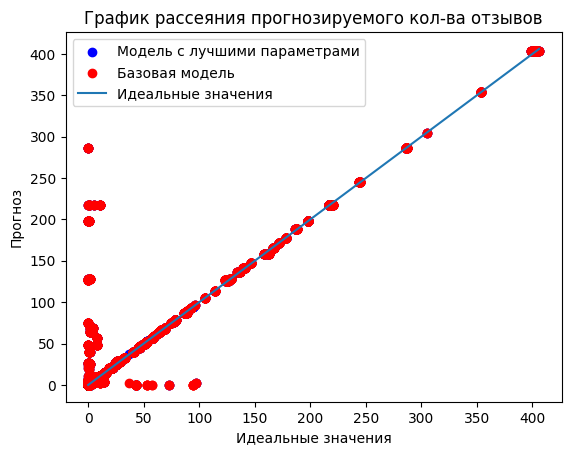

In [ ]:
import matplotlib.pyplot as plt
# График рассеяния прогнозируемого кол-ва отзывов
plt.scatter(y_test, y_prog_best, c='blue', label='Модель с лучшими параметрами')
plt.scatter(y_test, y_prog_base, c='red', label='Базовая модель')

# Идеальная линия
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label='Идеальные значения')

plt.xlabel('Идеальные значения')
plt.ylabel('Прогноз')
plt.title('График рассеяния прогнозируемого кол-ва отзывов')
plt.legend()
plt.show()